# Analyzing IMDB Data in Keras

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## 1. Loading the data
This dataset comes preloaded with Keras, so one simple command will get us training and testing data. There is a parameter for how many words we want to look at. We've set it at 1000, but feel free to experiment.

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000, skip_top=10)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## 2. Examining the data
Notice that the data has been already pre-processed, where all the words have numbers, and the reviews come in as a vector with the words that the review contains. For example, if the word 'the' is the first one in our dictionary, and a review contains the word 'the', then there is a 1 in the corresponding vector.

The output comes as a vector of 1's and 0's, where 1 is a positive sentiment for the review, and 0 is negative.

In [3]:
print(x_train[0])
print(y_train[0])

[2, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 2, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2, 19, 14, 22, 2, 2, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 2, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 2, 2, 2, 107, 117, 2, 15, 256, 2, 2, 2, 2, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 2, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2, 56, 26, 141, 2, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 2, 88, 12, 16, 283, 2, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


## 3. One-hot encoding the output
Here, we'll turn the input vectors into (0,1)-vectors. For example, if the pre-processed vector contains the number 14, then in the processed vector, the 14th entry will be 1.

In [4]:
# One-hot encoding the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train[0])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  1.  1.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

And we'll also one-hot encode the output.

In [5]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


## 4. Building the  model architecture
Build a model here using sequential. Feel free to experiment with different layers and sizes! Also, experiment adding dropout to reduce overfitting.

In [6]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
# Note that filling out the empty rank as "0", gave us an extra column, for "Rank 0" students.
# Thus, our input dimension is 7 instead of 6.
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1000,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               128128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 136,514
Trainable params: 136,514
Non-trainable params: 0
_________________________________________________________________


## 5. Training the model
Run the model here. Experiment with different batch_size, and number of epochs!

In [7]:
# Training the model
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
3s - loss: 0.4076 - acc: 0.8142 - val_loss: 0.3381 - val_acc: 0.8542
Epoch 2/10
3s - loss: 0.3081 - acc: 0.8707 - val_loss: 0.3273 - val_acc: 0.8580
Epoch 3/10
2s - loss: 0.2636 - acc: 0.8909 - val_loss: 0.3280 - val_acc: 0.8586
Epoch 4/10
2s - loss: 0.2101 - acc: 0.9164 - val_loss: 0.3623 - val_acc: 0.8537
Epoch 5/10
3s - loss: 0.1467 - acc: 0.9470 - val_loss: 0.4144 - val_acc: 0.8532
Epoch 6/10
2s - loss: 0.0910 - acc: 0.9672 - val_loss: 0.5023 - val_acc: 0.8481
Epoch 7/10
3s - loss: 0.0640 - acc: 0.9765 - val_loss: 0.5385 - val_acc: 0.8450
Epoch 8/10
3s - loss: 0.0535 - acc: 0.9807 - val_loss: 0.5713 - val_acc: 0.8473
Epoch 9/10
3s - loss: 0.0431 - acc: 0.9856 - val_loss: 0.6274 - val_acc: 0.8421
Epoch 10/10
3s - loss: 0.0356 - acc: 0.9866 - val_loss: 0.6791 - val_acc: 0.8422


## 6. Evaluating the model
This will give you the accuracy of the model, as evaluated on the testing set. Can you get something over 85%?

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: ", score[1])

('Accuracy: ', 0.84219999999999995)


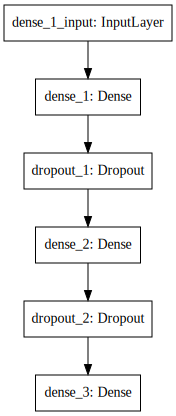

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
3s - loss: 0.0229 - acc: 0.9922 - val_loss: 0.6709 - val_acc: 0.8459
Epoch 2/10
2s - loss: 0.0209 - acc: 0.9926 - val_loss: 0.6781 - val_acc: 0.8467
Epoch 3/10
2s - loss: 0.0161 - acc: 0.9954 - val_loss: 0.6899 - val_acc: 0.8473
Epoch 4/10
2s - loss: 0.0161 - acc: 0.9950 - val_loss: 0.6987 - val_acc: 0.8479
Epoch 5/10
2s - loss: 0.0150 - acc: 0.9955 - val_loss: 0.7051 - val_acc: 0.8471
Epoch 6/10
2s - loss: 0.0134 - acc: 0.9960 - val_loss: 0.7124 - val_acc: 0.8468
Epoch 7/10
2s - loss: 0.0139 - acc: 0.9961 - val_loss: 0.7164 - val_acc: 0.8463
Epoch 8/10
2s - loss: 0.0142 - acc: 0.9955 - val_loss: 0.7196 - val_acc: 0.8467
Epoch 9/10
2s - loss: 0.0144 - acc: 0.9958 - val_loss: 0.7182 - val_acc: 0.8468
Epoch 10/10
2s - loss: 0.0118 - acc: 0.9962 - val_loss: 0.7202 - val_acc: 0.8469
('Accuracy: ', 0.84692000000000001)


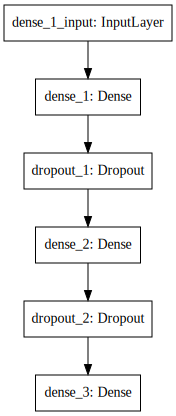

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


Epoch 1/10
2s - loss: 0.0026 - acc: 0.9971
Epoch 2/10
1s - loss: 0.0028 - acc: 0.9964
Epoch 3/10
1s - loss: 0.0023 - acc: 0.9974
Epoch 4/10
2s - loss: 0.0028 - acc: 0.9964
Epoch 5/10
1s - loss: 0.0025 - acc: 0.9968
Epoch 6/10
1s - loss: 0.0024 - acc: 0.9970
Epoch 7/10
2s - loss: 0.0024 - acc: 0.9970
Epoch 8/10
2s - loss: 0.0024 - acc: 0.9970
Epoch 9/10
2s - loss: 0.0020 - acc: 0.9977
Epoch 10/10
1s - loss: 0.0023 - acc: 0.9973
('Accuracy: ', 0.84728000000000003)


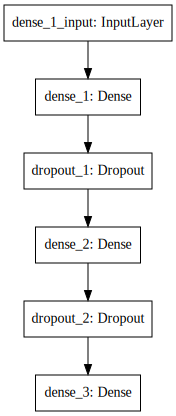

In [15]:
model.compile(loss = 'mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Epoch 1/10
3s - loss: 0.0047 - acc: 0.9940
Epoch 2/10
3s - loss: 0.0042 - acc: 0.9946
Epoch 3/10
2s - loss: 0.0039 - acc: 0.9950
Epoch 4/10
2s - loss: 0.0029 - acc: 0.9964
Epoch 5/10
2s - loss: 0.0031 - acc: 0.9963
Epoch 6/10
2s - loss: 0.0028 - acc: 0.9967
Epoch 7/10
2s - loss: 0.0025 - acc: 0.9967
Epoch 8/10
2s - loss: 0.0026 - acc: 0.9967
Epoch 9/10
2s - loss: 0.0023 - acc: 0.9973
Epoch 10/10
2s - loss: 0.0020 - acc: 0.9973
('Accuracy: ', 0.84784000000000004)


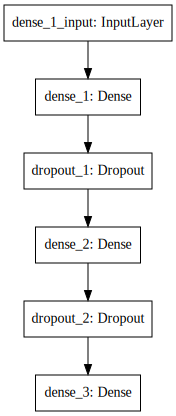

In [16]:

model.compile(loss = 'mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)

score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
30s - loss: 0.3835 - acc: 0.8314 - val_loss: 0.3261 - val_acc: 0.8572
Epoch 2/10
22s - loss: 0.3062 - acc: 0.8680 - val_loss: 0.3200 - val_acc: 0.8597
Epoch 3/10
24s - loss: 0.2603 - acc: 0.8939 - val_loss: 0.3209 - val_acc: 0.8612
Epoch 4/10
23s - loss: 0.1996 - acc: 0.9219 - val_loss: 0.3364 - val_acc: 0.8587
Epoch 5/10
22s - loss: 0.1338 - acc: 0.9537 - val_loss: 0.3609 - val_acc: 0.8565
Epoch 6/10
22s - loss: 0.0850 - acc: 0.9722 - val_loss: 0.4218 - val_acc: 0.8565
Epoch 7/10
22s - loss: 0.0600 - acc: 0.9804 - val_loss: 0.4513 - val_acc: 0.8548
Epoch 8/10
35s - loss: 0.0474 - acc: 0.9854 - val_loss: 0.4704 - val_acc: 0.8550
Epoch 9/10
34s - loss: 0.0401 - acc: 0.9866 - val_loss: 0.4982 - val_acc: 0.8542
Epoch 10/10
23s - loss: 0.0365 - acc: 0.9872 - val_loss: 0.5360 - val_acc: 0.8545
('Accuracy: ', 0.85451999999999995)


In [21]:

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
24s - loss: 0.3835 - acc: 0.8296 - val_loss: 0.3289 - val_acc: 0.8551
Epoch 2/10
23s - loss: 0.3043 - acc: 0.8702 - val_loss: 0.3192 - val_acc: 0.8602
Epoch 3/10
24s - loss: 0.2544 - acc: 0.8943 - val_loss: 0.3266 - val_acc: 0.8582
Epoch 4/10
22s - loss: 0.1963 - acc: 0.9236 - val_loss: 0.3345 - val_acc: 0.8585
Epoch 5/10
22s - loss: 0.1

In [24]:
# as in the solution:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10


KeyboardInterrupt: 

In [25]:
# as in the solution:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
20s - loss: 0.3980 - acc: 0.8284 - val_loss: 0.3313 - val_acc: 0.8610
Epoch 2/10
18s - loss: 0.3336 - acc: 0.8678 - val_loss: 0.4122 - val_acc: 0.8355
Epoch 3/10
20s - loss: 0.3210 - acc: 0.8774 - val_loss: 0.3499 - val_acc: 0.8608
Epoch 4/10
19s - loss: 0.3082 - acc: 0.8846 - val_loss: 0.3672 - val_acc: 0.8590
Epoch 5/10
19s - loss: 0.3

In [23]:
# More layers!
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', ))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

hist = model.fit(x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test, y_test), 
          verbose=2)
score = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 130       
Total para

In [8]:
from keras.callbacks import ModelCheckpoint   

# as in the solution:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()




# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.33967, saving model to mnist.model.best.hdf5
5s - loss: 0.4289 - acc: 0.8074 - val_loss: 0.3397 - val_acc: 0.8568
Epoch 2/10
Epoch 00001: val_loss improved from 0.33967 to 0.33148, saving model to mnist.model.best.hdf5
5s - loss: 0.3143 - acc: 0.8671 - val_loss: 0.3315 - val_acc: 0.8642
Epoch 3

In [9]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss did not improve
12s - loss: 0.2631 - acc: 0.8952 - val_loss: 0.3870 - val_acc: 0.8582
Epoch 2/10
Epoch 00001: val_loss did not improve
12s - loss: 0.2474 - acc: 0.9118 - val_loss: 0.4087 - val_acc: 0.8596
Epoch 3/10
Epoch 00002: val_loss did not improve
12s - loss: 0.2320 - acc: 0.9240 - val_loss: 0.4639 - val_acc: 0.8544
Epoch 4/10
Epoch 00003: val_loss did not improve
15s - loss: 0.2103 - acc: 0.9357 - val_loss: 0.4965 - val_acc: 0.8562
Epoch 5/10
Epoch 00004: val_loss did not improve
22s - loss: 0.1950 - acc: 0.9449 - val_loss: 0.5511 - val_acc: 0.8528
Epoch 6/10
Epoch 00005: val_loss did not improve
15s - loss: 0.1824 - acc: 0.9503 - val_loss: 0.5744 - val_acc: 0.8526
Epoch 7/10
Epoch 00006: val_loss did not improve
20s - loss: 0.1610 - acc: 0.9578 - val_loss: 0.6350 - val_acc: 0.8552
Epoch 8/10
Epoch 00007: val_loss did not improve
26s - loss: 0.1471 - acc: 0.9606 - val_loss: 0.6754 - val_acc: 0.8546

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(2.0))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 513,538
Trainable params: 513,538
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.33785, saving model to imdb.model.best.hdf5
6s - loss: 0.4208 - acc: 0.8130 - val_loss: 0.3379 - val_acc: 0.8552
Epoch 2/10
Epoch 00001: val_loss did not improve
7s - loss: 0.3121 - acc: 0.8683 - val_loss: 0.3469 - val_acc: 0.8498
Epoch 3/10
Epoch 00002: val_loss did not improve
6s - loss: 0.24

In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()




# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 545,474
Trainable params: 545,474
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.33519, saving model to imdb.mod

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()




# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 130       
Total params: 545,474
Trainable params: 545,474
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.33112, saving model to imdb.mod

In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 130       
Total params: 545,474
Trainable params: 545,474
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.33552, saving model to imdb.mod

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=1000))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

# train the model
checkpointer = ModelCheckpoint(filepath='imdb.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=2, shuffle=True)

# load the weights that yielded the best validation accuracy
model.load_weights('imdb.model.best.hdf5')

# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 130       
Total params: 545,474
Trainable params: 545,474
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.38353, saving model to imdb.mo